[1 1 1 0 1 1 1 0]
[0.000e+00 1.000e-03 2.000e-03 ... 7.997e+00 7.998e+00 7.999e+00]
Transmitted (hex): 0xee
Received (hex): [0 0 0 ... 1 1 1]
7001
00010001
11101110


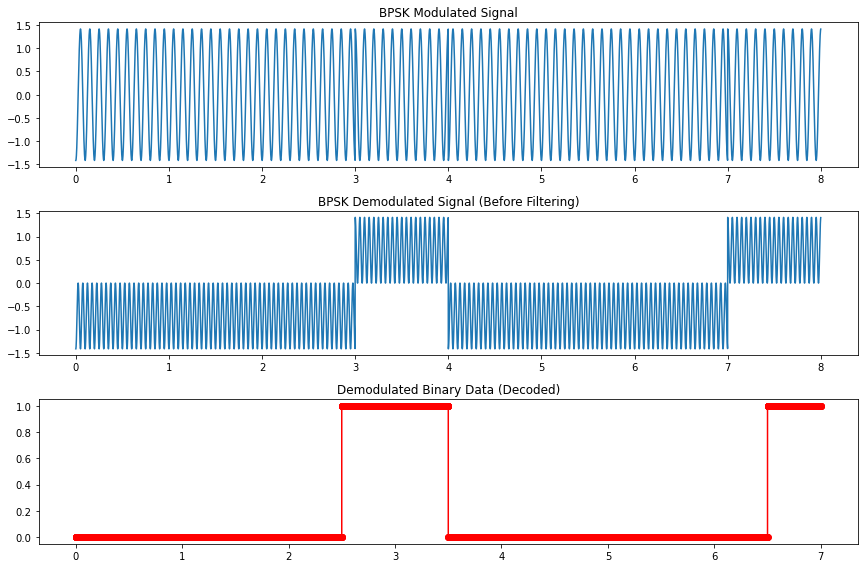

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency
fc = 10  # Carrier frequency
T = 1  # Symbol duration (seconds)
bits_per_symbol = 8

# Generate random binary data
#binary_data = np.random.randint(2, size=bits_per_symbol)
binary_data = [1 1 1 1 1 1 1 1]

print(binary_data)

# BPSK Modulation
t_mod = np.arange(0, len(binary_data) * T, T/fs)
print(t_mod)
modulated_signal = np.sqrt(2/T) * np.cos(2 * np.pi * fc * t_mod + np.pi * np.repeat(binary_data, int(fs*T)))

# Convert binary data to hex for display
hex_transmitted = hex(int(''.join(map(str, binary_data)), 2))

# BPSK Demodulation
t_dem = np.arange(0, len(binary_data) * T, T/fs)
demodulated_signal = modulated_signal * np.cos(2 * np.pi * fc * t_dem)

# Filter the demodulated signal (low-pass filter)
demodulated_signal_filtered = np.convolve(demodulated_signal, np.ones(int(fs * T))/fs, mode='valid')

# Decision Threshold (assuming perfect synchronization)
threshold = 0
binary_decoded = (demodulated_signal_filtered > threshold).astype(int)

# Convert binary data to hex for display
hex_received = hex(int(''.join(map(str, binary_decoded)), 2))

# Print hex values
print("Transmitted (hex):", hex_transmitted)
print("Received (hex):", binary_decoded)
print(len(binary_decoded))
message = ''
message2 = ''
i = int(len(binary_decoded) // (bits_per_symbol * 2))
while i < len(binary_decoded):
    message += str(binary_decoded[i])
    if str(binary_decoded[i]) == '1':
        message2 += '0'
    else:
        message2 += '1'
    i += (len(binary_decoded) // bits_per_symbol)
    
print(message)
print(message2)

# Plot the signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t_mod, modulated_signal)
plt.title('BPSK Modulated Signal')

plt.subplot(3, 1, 2)
plt.plot(t_dem, demodulated_signal)
plt.title('BPSK Demodulated Signal (Before Filtering)')

plt.subplot(3, 1, 3)
plt.plot(t_dem[:len(binary_decoded)], binary_decoded, 'ro-', drawstyle='steps-pre')
plt.title('Demodulated Binary Data (Decoded)')

plt.tight_layout()
plt.show()


In [3]:
from pynq.overlays.base import BaseOverlay
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency
fc = 10  # Carrier frequency
T = 1  # Symbol duration (seconds)
bits_per_symbol = 16

# Initialize the RFSoC overlay
base = BaseOverlay('base.bit')
base.init_rf_clks()

base.radio.transmitter.channel[0].dac_block.

# Set the RF transmitter frequency to 1200 MHz
base.radio.transmitter.channel[0].dac_block.MixerSettings['Freq'] = 1200
base.radio.transmitter.channel[0].dac_block.QMCSettings

# Configure the transmitter to a known gain and enable it
base.radio.transmitter.channel[0].control.gain = 0.5
base.radio.transmitter.channel[0].control.enable = True

# Generate binary data (0s and 1s)
binary_data = np.random.randint(2, size=bits_per_symbol)

# BPSK Modulation
t_mod = np.arange(0, T, 1/fs)
repeated_binary_data = np.repeat(binary_data, int(np.ceil(len(t_mod) / len(binary_data))))
modulated_signal = np.sqrt(2/T) * np.cos(2 * np.pi * fc * t_mod + np.pi * repeated_binary_data[:len(t_mod)])

# Transmit the modulated signal
# base.radio.transmitter.channel[0].send(modulated_signal)

# Receive the transmitted signal
received_signal = base.radio.receiver.channel[2].transfer(len(modulated_signal))

# BPSK Demodulation
demodulated_signal = received_signal * np.sqrt(2/T) * np.cos(2 * np.pi * fc * t_mod + np.pi)
demodulated_signal_filtered = np.convolve(demodulated_signal, np.ones(int(fs * T))/fs, mode='valid')
# Decision Threshold (assuming perfect synchronization)
threshold = 0
binary_decoded = (demodulated_signal_filtered > threshold).astype(int)
print(len(binary_decoded))
# Convert binary data to hex for display
hex_received = hex(int(''.join(map(str, binary_decoded)), 2))
hex_transmitted = hex(int(''.join(map(str, binary_data)), 2))
# Print hex values
print("Transmitted (hex):", hex_transmitted)
print("Received (hex):", binary_decoded)
print(len(binary_decoded))
message = ''
message2 = ''
i = int(len(binary_decoded) // (bits_per_symbol * 2))
while i < len(binary_decoded):
    message += str(binary_decoded[i])
    if str(binary_decoded[i]) == '1':
        message2 += '0'
    else:
        message2 += '1'
    i += (len(binary_decoded) // bits_per_symbol)
    
print(message)
print(message2)
# Binarize the demodulated signal
decoded_data = (demodulated_signal_filtered > 0).astype(int)

# Calculate the bit error rate (BER)
ber = np.sum(np.abs(binary_data - decoded_data)) / len(binary_data)

# # Print the bit error rate
# print(f"Bit Error Rate (BER): {ber}")

# #Plot the transmitted and received signals
# plt.figure(figsize=(12, 6))
# plt.subplot(2, 1, 1)
# plt.plot(t_mod, np.real(modulated_signal), label='Transmitted Signal (I)')
# plt.title("Transmitted BPSK Signal")
# plt.legend()

# plt.subplot(2, 1, 2)
# plt.plot(t_mod, np.real(demodulated_signal_filtered), label='Received Signal (I)')
# plt.title("Received and Demodulated BPSK Signal")
# plt.legend()

# plt.tight_layout()
# plt.show()

AttributeError: 'RFdcDacBlock' object has no attribute 'M'

In [ ]:
import ipywidgets as ipw
from rfsystem.spectrum_sweep import SpectrumAnalyser

analysers = []
sample_frequency = 2457.6e6
number_samples = 12288
for i in [2,3]:
    analysers.append(
        SpectrumAnalyser(channel = base.radio.receiver.channel[i],
                         sample_frequency = sample_frequency,
                         number_samples = number_samples,
                         title = ''.join(['Spectrum Analyser Channel ',
                                          str(i)]),
         MixerSettings               height = None,
                         width = None))

ipw.VBox([analyser.spectrum_plot.get_plot() for analyser in analysers])

In [62]:
hex_len = len(hex_received)

In [63]:
# Example usage:
received_bits = '';
j = int(hex_len/8)
while j < len(hex_received):
    print(hex_received[j])
    if hex_received[j] == '0':
        received_bits += '0'
    else:
        
        received_bits += '1'
    j += int(hex_len/4)
    
    
print(received_bits)


f
f
0
0
1100


In [22]:
from pynq.overlays.base import BaseOverlay
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parameters
fs = 1000  # Sampling frequency
fc = 10  # Carrier frequency
T = 1  # Symbol duration (seconds)
bits_per_symbol = 16

# Initialize the RFSoC overlay
base = BaseOverlay('base.bit')
base.init_rf_clks()

# Set the RF transmitter frequency to 1200 MHz
base.radio.transmitter.channel[0].dac_block.MixerSettings['Freq'] = 1200
base.radio.transmitter.channel[0].dac_block.QMCSettings

# Configure the transmitter to a known gain and enable it
base.radio.transmitter.channel[0].control.gain = 0.5
base.radio.transmitter.channel[0].control.enable = True

# Generate binary data (0s and 1s)
binary_data = np.random.randint(2, size=bits_per_symbol)

# BPSK Modulation
t_mod = np.arange(0, T, 1/fs)
repeated_binary_data = np.repeat(binary_data, int(np.ceil(len(t_mod) / len(binary_data))))
modulated_signal = np.sqrt(2/T) * np.cos(2 * np.pi * fc * t_mod + np.pi * repeated_binary_data[:len(t_mod)])

# Transmit the modulated signal by enabling the control
# (The actual transmission will happen automatically)
# base.radio.transmitter.channel[0].send(modulated_signal)

# Sleep for a duration equal to the transmission time
# (This is just for the sake of this example; you might need to adjust this based on your system)
import time
time.sleep(T * bits_per_symbol)

# Disable the transmitter after transmission is complete
base.radio.transmitter.channel[0].control.enable = False

# Receive the transmitted signal
received_signal = base.radio.receiver.channel[2].transfer(len(modulated_signal))

# Now, you can proceed with demodulation and other processing...
# BPSK Demodulation
demodulated_signal = received_signal * np.sqrt(2/T) * np.cos(2 * np.pi * fc * t_mod + np.pi)
demodulated_signal_filtered = np.convolve(demodulated_signal, np.ones(int(fs * T))/fs, mode='valid')
# Decision Threshold (assuming perfect synchronization)
threshold = 0
binary_decoded = (demodulated_signal_filtered > threshold).astype(int)

# Convert binary data to hex for display
hex_received = hex(int(''.join(map(str, binary_decoded)), 2))
hex_transmitted = hex(int(''.join(map(str, binary_data)), 2))
# Print hex values
print("Transmitted (hex):", hex_transmitted)
print("Received (hex):", hex_received)
print(len(binary_decoded))
message = ''
message2 = ''
i = int(len(binary_decoded) // (bits_per_symbol * 2))
while i < len(binary_decoded):
    message += str(binary_decoded[i])
    if str(binary_decoded[i]) == '1':
        message2 += '0'
    else:
        message2 += '1'
    i += (len(binary_decoded) // bits_per_symbol)
    
print(message)
print(message2)
# Binarize the demodulated signal
decoded_data = (demodulated_signal_filtered > 0).astype(int)

# Calculate the bit error rate (BER)
ber = np.sum(np.abs(binary_data - decoded_data)) / len(binary_data)

# # Print the bit error rate
print(f"Bit Error Rate (BER): {ber}")

# Plot the transmitted and received signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_mod, np.real(modulated_signal), label='Transmitted Signal (I)')
plt.title("Transmitted BPSK Signal")
plt.legend()

plt.subplot(2, 1, 2)
# Plot the received and demodulated signal if applicable
plt.plot(t_mod[:len(demodulated_signal_filtered)], np.real(demodulated_signal_filtered), label='Received Signal (I)')
plt.title("Received and Demodulated BPSK Signal")
plt.legend()

plt.tight_layout()
plt.show()


Transmitted (hex): 0x30cc
Received (hex): 0x1
1


KeyboardInterrupt: 